In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
from wordcloud import WordCloud
from collections import Counter

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  
plt.rc('figure', figsize=(10, 10))  
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False 
%matplotlib inline

In [32]:
data = {}
data['百度'] = pd.read_csv('data/baidu.csv')
data['微博'] = pd.read_csv('data/weibo.csv')
data['微信'] = pd.read_csv('data/weixin.csv')
data['知乎'] = pd.read_csv('data/zhihu.csv')
data['bilibili'] = pd.read_csv('data/bilibili.csv')
data['抖音'] = pd.read_csv('data/douyin.csv')

In [33]:
jieba.load_userdict('dict.txt')
swords = [x.strip() for x in open ('stopwords.txt', encoding='utf-8')]

In [34]:

def get_wordcloud(data, swords):
    text = ''.join(data)
    words = ' '.join(jieba.cut(text))
    
    wordcloud = WordCloud(font_path='Simkai.ttf', width=1600, height=1000, mode='RGBA', background_color=None,stopwords=swords).generate(words)
    
    return wordcloud


In [35]:
clouds = {}
for data_name in data:
    clouds[data_name] = get_wordcloud(data=data[data_name]['text'].str.replace(' ', ''), swords=swords)


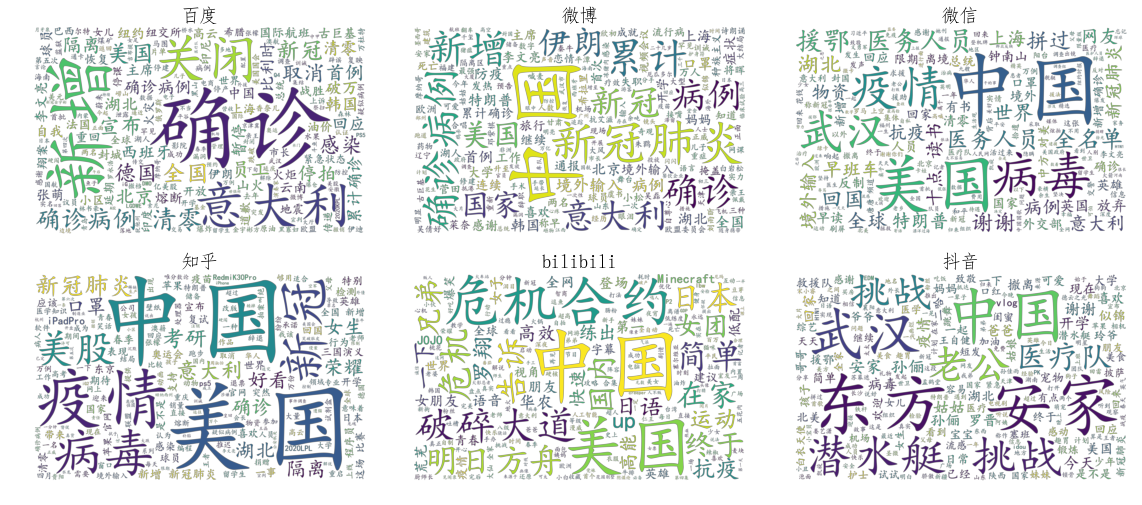

In [39]:
plt.figure(figsize = (16, 7))
i = 0
for cloud_name in clouds:
    i += 1
    plt.subplot(2,3,i)
    plt.imshow(clouds[cloud_name], interpolation='bilinear')
    plt.axis('off')
    plt.title(cloud_name, fontsize=19)
plt.tight_layout()


In [65]:
import numpy as np
def type_statistic(temp_data, types):
    df = pd.DataFrame(np.zeros((len(temp_data), len(types))))
    type_flags = np.zeros(len(types))
    for i in range(len(temp_data)):
        t_type = int(temp_data['type'][i]) -1
        df[t_type][type_flags[t_type]] = temp_data['text'][i]
        type_flags[t_type]+=1
    return df

In [66]:
temp_weibo = pd.read_csv('data/weibotemp.csv')
types_weibo = ['国外疫情相关话题','国内疫情相关话题','文娱','生活','国际经济','科技','体育']
df_weibo = type_statistic(temp_weibo, types_weibo)
df_weibo.to_csv('data/weibo_test.csv',encoding='utf_8_sig')

In [67]:
temp_zhihu = pd.read_csv('data/zhihutemp.csv')
types_zhihu = ['国内疫情相关','国外疫情相关','互联网及消费领域','国内及国际经济','时事评论','日常生活','知识/技能分享','文娱','游戏9']
df_zhihu = type_statistic(temp_zhihu, types_zhihu)
df_zhihu.to_csv('data/zhihu_stat.csv',encoding='utf_8_sig')